# Jupyter Notebook for Near Online Analysis

First, we need to import few libraries.

In [1]:
import os
import numpy as np
import scipy.integrate as integrate
from spectres import spectres
import flashdaqhdfutils as fdu
from pepico_library import pepico
from pandas.core.common import flatten
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import peakutils
from peakutils.plot import plot as pplot
%matplotlib inline

## Saving data in pandas dataframe

Please mention run numbers in `run_list` as a list.

In [2]:
run_list = [32478, 32479]
dset_names = {"/FL1/Experiment/BL1/CAMP/VMI CMOS camera 1/image": "VMI_1_image",
              "/FL1/Experiment/BL1/CAMP/VMI CMOS camera 2/image": "VMI_2_image",
              "/FL1/Experiment/BL1/ADQ412 GHz ADC/CH00/TD": "ToF",
              "/FL1/Experiment/Pump probe laser/delay line IK220.0/ENC": "Delay",
              "/FL1/Photon Diagnostic/GMD/Average energy/energy BDA (raw) copy": "Average_energy_BDA",
              "/FL1/Photon Diagnostic/GMD/Pulse resolved energy/energy BDA (raw) copy": "Pulse_resolved_energy_BDA"
              }

files = flatten(fdu.run_files(each_run, directory="./data", daq="fl1user1") for each_run in run_list)
df = fdu.files_dsets_data_frame(files, dset_names)

files = flatten(fdu.run_files(each_run, directory="./data", daq="fl1user1") for each_run in run_list)
df = df.join(fdu.date_time_data_frame(files))

df.dropna(inplace=True)
df

,Average_energy_BDA,Delay,Pulse_resolved_energy_BDA,ToF,VMI_1_image,Date/Time
Train ID,,,,,,
619018905,[34.96745],"[29847.617, 229.90381, 0.02669, -566.7291]",[30.80251],"[-1767, -1764, -1768, -1768, -1767, -1765, -17...","[[36, 45, 41, 30, 35, 49, 32, 34, 39, 28, 54, ...",2019-12-18 15:28:11.857943
619018906,[34.96745],"[29847.623, 229.90393, 0.02669, -566.7291]",[36.541683],"[-1769, -1768, -1771, -1763, -1769, -1770, -17...","[[44, 26, 43, 38, 49, 45, 49, 37, 54, 35, 44, ...",2019-12-18 15:28:11.957899
619018907,[34.96745],"[29847.62, 229.90387, 0.02669, -566.7291]",[35.347084],"[-1767, -1766, -1764, -1770, -1772, -1769, -17...","[[47, 36, 46, 40, 38, 50, 32, 42, 38, 34, 34, ...",2019-12-18 15:28:12.057856
619018908,[34.96745],"[29847.617, 229.90381, 0.02669, -566.7291]",[44.79362],"[-1764, -1770, -1769, -1766, -1766, -1770, -17...","[[54, 36, 27, 36, 38, 33, 43, 38, 39, 40, 44, ...",2019-12-18 15:28:12.157812
619018909,[34.96745],"[29847.621, 229.90393, 0.02669, -566.7291]",[29.368898],"[-1768, -1771, -1765, -1764, -1767, -1768, -17...","[[32, 41, 37, 46, 40, 36, 29, 24, 35, 49, 58, ...",2019-12-18 15:28:12.257714
...,...,...,...,...,...,...
619414839,[32.949566],"[29772.852, 227.90833, 0.02669, -566.7291]",[29.411396],"[-1770, -1765, -1767, -1767, -1767, -1762, -17...","[[42, 53, 26, 44, 42, 42, 30, 40, 34, 40, 48, ...",2019-12-19 02:28:05.775663
619414840,[32.949566],"[29772.85, 227.90826, 0.02669, -566.7291]",[35.840446],"[-1764, -1771, -1765, -1765, -1765, -1769, -17...","[[45, 37, 47, 27, 42, 31, 32, 18, 28, 54, 38, ...",2019-12-19 02:28:05.875565
619414841,[32.92009],"[29772.852, 227.90833, 0.02669, -566.7291]",[35.753338],"[-1769, -1770, -1765, -1767, -1769, -1770, -17...","[[42, 38, 42, 31, 53, 36, 44, 39, 38, 35, 50, ...",2019-12-19 02:28:05.975521


## Visualisation of energy and delay wrt trainID

In [3]:
df.loc[:,'Delay'] = df.loc[:,'Delay'].apply(lambda x: x[1])
df.loc[:,'Average_energy_BDA'] = df.loc[:,'Average_energy_BDA'].apply(lambda x: x[0])
df.loc[:,'Pulse_resolved_energy_BDA'] = df.loc[:,'Pulse_resolved_energy_BDA'].apply(lambda x: x[0])

Text(0, 0.5, 'Delay stage reading')

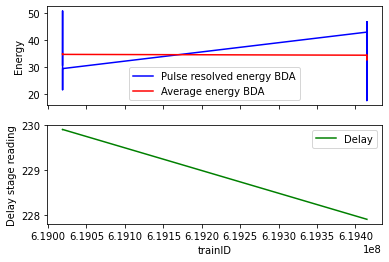

In [4]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(df['Pulse_resolved_energy_BDA'], label='Pulse resolved energy BDA', color='blue')
axs[0].plot(df['Average_energy_BDA'], label='Average energy BDA', color='red')
axs[0].legend()
axs[0].set_ylabel('Energy')
axs[1].plot(df['Delay'], label='Delay', color='green')
axs[1].legend()
axs[1].set_xlabel('trainID')
axs[1].set_ylabel('Delay stage reading')

## Time of Flight Spectra

### Preparing ToF data
It changes ToF data's axis. 
Change `deltaToF` for different binning.

In [5]:
trainID = df.index
ntrain = len(trainID)

nbinToF = df.loc[trainID[0],'ToF'].shape[0]
axisToF = np.arange(0, nbinToF, 1)
deltaToF = 100
new_axisToF = np.arange(0, nbinToF, deltaToF)
ToFmatrix = np.zeros([ntrain,new_axisToF.shape[0]])
for i in range(ntrain):
    ToF=df.loc[trainID[i],'ToF']
    ToF = ToF-ToF[0]
    ToFmatrix[i,:] = spectres(new_axisToF,axisToF,ToF,verbose=False)

### Plotting ToF matrix.

- X-axis is just a index for ToF matrix 
- Y-axis is index of trainID

We can also plot ToF spectra in 2D, different color is different trainIDs.

(0.0, 1000.0)

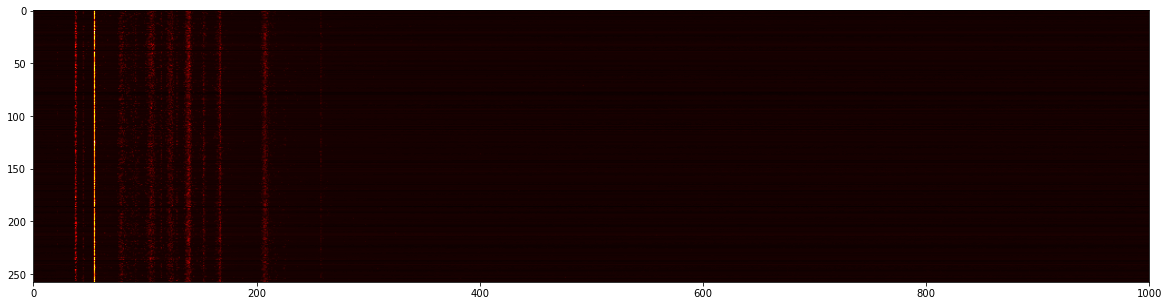

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
ax.imshow(ToFmatrix, cmap = 'hot', aspect = 'auto')
ax.set_xlim([0,1000])

(0.0, 10000.0)

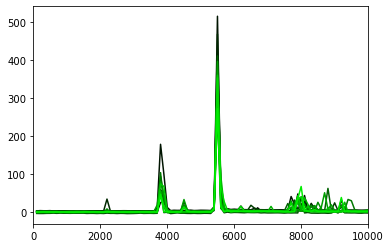

In [7]:
dcolor = 1/ntrain
fig, ax = plt.subplots()
for i in range(0,ntrain,20):
    ax.plot(new_axisToF, ToFmatrix[i,:], color=[0, i*dcolor, 0])
ax.set_xlim([0,10000])

### Detecting And Calibrating Peaks
As it is hard to detect ToF peaks visually, we can use peak comparision to detect them.

When doing the fitting, please run save block more than once if get any warnings.

In [8]:
# Approximate Values
threshold_of_peak = 10
minimum_distance_between_peaks = 300

In [9]:
index_train = []
for i in range(0, ntrain) :
    y = ToFmatrix[i]
    indexes = peakutils.indexes(y, thres=threshold_of_peak, min_dist=int(minimum_distance_between_peaks / deltaToF), thres_abs=True)
    index_train.append(indexes)

[ 3800  4500  5500  7800  8800 10600 11100 11900 12400 13800 14200 15300
 16700 20800 21200 21700 22600 25800]


(0.0, 15000.0)

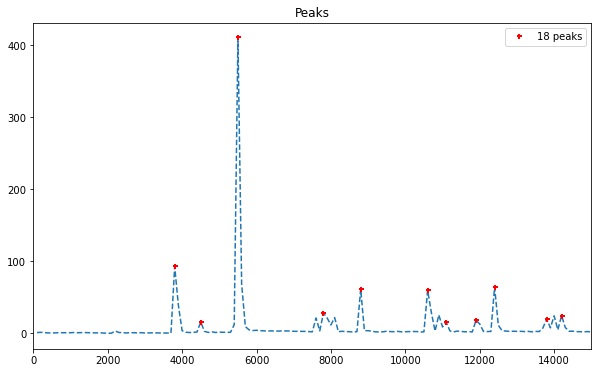

In [10]:
# Lets Plot a single ToF spectra
train = 100
print(new_axisToF[index_train[train]])
plt.figure(figsize=(10, 6))
pplot(new_axisToF, ToFmatrix[train], index_train[train])
plt.title("Peaks")
plt.xlim([0, 15000])

In [12]:
# Please check fitting visually too. Few peaks does not get properly fit
peaks_x = peakutils.interpolate(new_axisToF, ToFmatrix[train], ind=index_train[train])
print(peaks_x)

[ 3.83563808e+03  4.50000000e+01  5.51631751e+03  7.80000000e+01
  8.80000000e+01  1.06316035e+04  1.06316035e+04 -2.18547040e+05
  1.24143719e+04  1.40147734e+04  1.40155503e+04  1.22401300e+04
  1.67589003e+04  2.07602502e+04  2.07602482e+04  2.07720816e+04
  2.22550684e+04  2.58150525e+04]


Please peak numbers and corresponding masses for calibration

In [14]:
peaks_no = [0, 2]
mass = [1, 4]

mass_sqrt = np.sqrt(mass)
def line(x, a, b) :
    return (a*x + b)

a0 = (peaks_x[peaks_no[-1]] - peaks_x[peaks_no[0]]) / (mass_sqrt[-1] - mass_sqrt[0])
b0 = peaks_x[peaks_no[0]] - a0 * np.sqrt(mass_sqrt[0])
para, cov = curve_fit(line, mass_sqrt, peaks_x[peaks_no], p0=[a0, b0])

In [15]:
np.savetxt(f'./cali/tof_mass_coef.dat', para, delimiter='\t')

### Calibrate ToF spectra using pre-saved parameters

In [16]:
para = np.loadtxt('./cali/tof_mass_coef.dat', delimiter='\t')
mass_data = ((new_axisToF - para[1])/ para[0])**2
ToFmatrix_mass = np.zeros(ToFmatrix.shape)
for i in range(0, ntrain) :
    for j in range(new_axisToF.size) :
        ToFmatrix_mass[i, j] = ToFmatrix[i, j] * abs((0.5 * para[0]**2) / (new_axisToF[j] - para[1]))

(0.0, 300000.0)

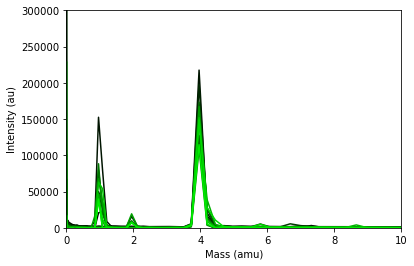

In [17]:
dcolor = 1/ntrain
fig, ax = plt.subplots()
for i in range(0,ntrain,20):
    ax.plot(mass_data, ToFmatrix_mass[i,:], color=[0, i*dcolor, 0])
ax.set_xlabel("Mass (amu)")
ax.set_ylabel("Intensity (au)")
ax.set_xlim([0,10])
ax.set_ylim([0, 3e5])

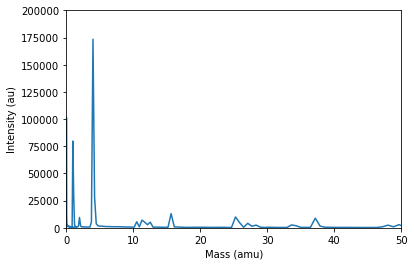

In [18]:
plt.plot(mass_data, ToFmatrix_mass[train])
plt.xlim([0, 50])
plt.ylim([0, 2E5])
plt.xlabel("Mass (amu)")
plt.ylabel("Intensity (au)")
plt.show()

### ToF peak Integration
We can define different section of tof spectra and integrate those peaks.

Text(0, 0.5, 'Integral Area')

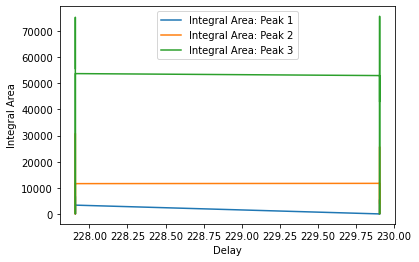

In [19]:
# ToF peak integration
ToFlims = np.array([[2000,3000],[3800,4100],[5000,6000]])
ToFlabel = ['ion1','ion2','ion3']
nToFintegral = ToFlims.shape[0]
ToFintegral = np.zeros([ntrain,nToFintegral])
Delayaxis = np.zeros(ntrain)
for i in range(ntrain):
    Delayaxis[i] = df.loc[trainID[i],'Delay']

for i in range(ntrain):
    for j in range(nToFintegral):
        xdata = new_axisToF[(new_axisToF >= ToFlims[j,0]) & (new_axisToF <= ToFlims[j,1])]
        ydata = ToFmatrix[i,:][(new_axisToF >= ToFlims[j,0]) & (new_axisToF <= ToFlims[j,1])]
        ToFintegral[i,j]=integrate.simps(ydata,xdata)
        if (ToFintegral[i,j] <= 0) :
            ToFintegral[i,j] = 0

fig, ax = plt.subplots()
for i in range(nToFintegral):
#for i in range(1):
    ax.plot(Delayaxis,ToFintegral[:,i], label = f'Integral Area: Peak {i+1}')
    #ax.plot(ToFintegral[:,i], label = f'Integral Area: Peak {i+1}')
ax.legend()
ax.set_xlabel('Delay')
ax.set_ylabel('Integral Area')

In [20]:
delay = np.zeros(ntrain)
delay_list = []
for i in range(ntrain) :
    delay[i] = df.loc[trainID[i], 'Delay']

In [20]:
# for i in range(1,nToFintegral):
#     ax.plot(Delayaxis,ToFintegral[:,0]/ToFintegral[:,i], label = f'Integral Area Ratio: Peak {1}/Peak {i}')
# ax.legend()
# ax.set_xlabel('Delay')
# ax.set_ylabel('Integral Area Ratio')

## VMI Image Analysis

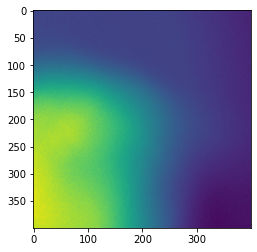

In [3]:
# vmi = df['VMI_1_image'].mean()
vmi = df['VMI_1_image'].mean()[0:400,0:400]

fig, ax = plt.subplots()
ax.imshow(vmi.transpose())

In [4]:
vmi.shape

(400, 400)

In [5]:
image_name = 'VMI_mean'
np.savetxt(f'./ana_dat/{image_name}.dat', vmi, delimiter='\t')
centre = (200, 200)
angle = 0
crop = False
radius = 100
# program_path = '/home/mandalsu/Desktop/FLASH_2021/Codes/NearOnlineAnanlysis/Test_Codes/lib/'
image_proc, mev_image, MEXdis = pepico.invert_image(image_name, centre, angle, radius, crop)



recognized from command line:



input  file : ./ana_dat/Proc_VMI_mean.dat     

output file : DefaultQ.dat                    

center      :   200  200

method      : use indices IZ, IX              

weights     : 1111

radius      :    0

scale       : 0.100000E+01



input  matrix is  400 by  400

center indices located at  200  200

output matrix is  199 by  199

 


In [6]:
image = np.loadtxt('./ana_dat/MEV_VMI_mean.dat', delimiter = '\t')

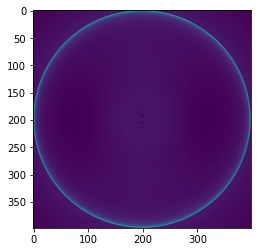

In [7]:
plt.imshow(image)